# Рынок заведений общественного питания Москвы

# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from pymystem3 import Mystem
from io import BytesIO
import requests
m = Mystem()

## Шаг №1. Загрузите данные и подготовьте их к анализу

In [2]:
rest_data = pd.read_csv('rest_data.csv', index_col=0)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 840.3+ KB


In [3]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
rest_data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [5]:
rest_data.duplicated().sum()

0

In [6]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [7]:
rest_data[rest_data['address'].duplicated(keep=False)]

,id,object_name,chain,object_type,address,number
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [8]:
rest_data.loc[(rest_data.chain == 'да'), 'chain'] = 'Сетевое'
rest_data.loc[(rest_data.chain == 'нет'), 'chain'] = 'Несетевое'
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,Несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,Несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,Несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,Несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


В наборе данных присутствует 6 столбцов с 15366 наблюдений. В этих столбцах собрана информация о наименованиях объектов, их идентификаторах, статусе сетевой/несетевой пункт, типе объекта, адресе и количестве посадочных мест. В столбце сетевого статуса было изменено значение с "да" на "сетевой" и с "нет" на "несетевой", так как это позволит в дальнейшем строить более информативные графики и для визуального восприятия информации в таблице. В таблице присутствуют дубликаты по адресу, но из таблицы их удалять нельзя, так как выборочно был проведен анализ с использованием внешних источников - выяснили, что в основном это столовые в ВУЗах, расположенные в одном учебном корпусе.

## Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [9]:
object_type_pivot_table = rest_data.groupby(by='object_type').count().reset_index()
object_type_pivot_table.drop(object_type_pivot_table.columns[[1, 2, 3, 4]], axis = 1, inplace = True)
object_type_pivot_table.reset_index()
object_type_pivot_table.columns = ['object_type', 'number_of_object']
object_type_pivot_table

,object_type,number_of_object
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1923
7,ресторан,2285
8,столовая,2587


In [10]:
object_type_pivot_table['number_of_object'].sum()

15366

In [11]:
object_type_pivot_table['ratio'] = round(object_type_pivot_table['number_of_object'] / object_type_pivot_table['number_of_object'].sum() * 100, 2)
object_type_pivot_table = object_type_pivot_table.sort_values(by='ratio', ascending=False)
object_type_pivot_table

,object_type,number_of_object,ratio
3,кафе,6099,39.69
8,столовая,2587,16.84
7,ресторан,2285,14.87
6,предприятие быстрого обслуживания,1923,12.51
0,бар,856,5.57
1,буфет,585,3.81
4,кафетерий,398,2.59
2,закусочная,360,2.34
5,магазин (отдел кулинарии),273,1.78


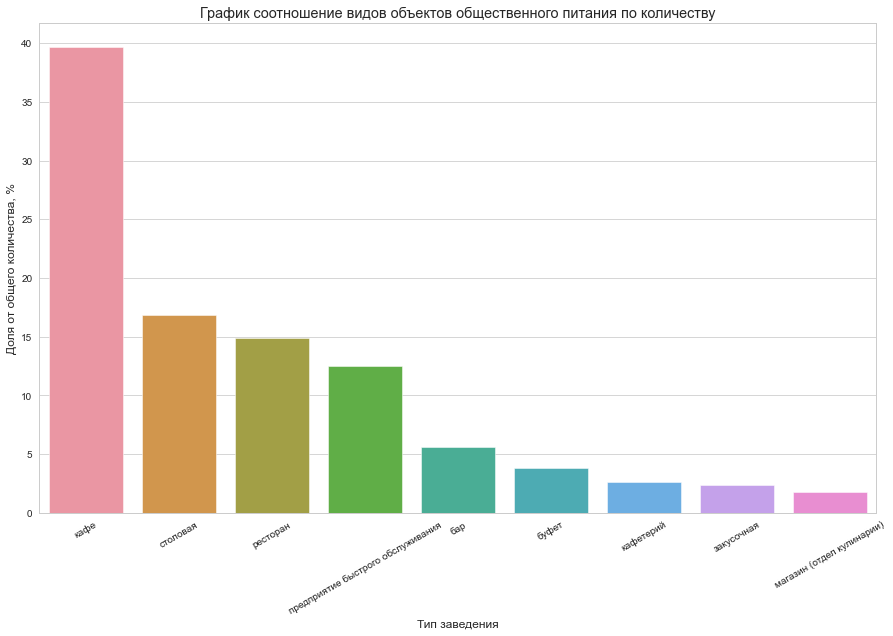

In [12]:

plt.style.use('ggplot')
plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")
plt.xticks(rotation=30)
ax = sns.barplot(x='object_type', y='ratio', data=object_type_pivot_table)
ax.set_title('График соотношение видов объектов общественного питания по количеству')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Доля от общего количества, %')
# ax.xticks(rotation=45)
plt.show()

Наиболее популярными типами объектов питания являются кафе, столовые и рестораны, которые занимают 39,7%, 16,85% и 14,87%, соответственно, от общего количества заведений в наборе. Наименьшую долю занимают магазины (отдел кулинарии) и закусочные, которые занимают менее 2,5%. 

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график

In [13]:
chain_pivot_table = rest_data.groupby(by='chain').count().reset_index()
chain_pivot_table.drop(chain_pivot_table.columns[[2, 3, 4, 5]], axis = 1, inplace = True)
chain_pivot_table.reset_index()
chain_pivot_table.columns = ['chain', 'number_of_object']
chain_pivot_table

,chain,number_of_object
0,Несетевое,12398
1,Сетевое,2968


In [14]:
chain_pivot_table['ratio'] = round(chain_pivot_table['number_of_object'] / chain_pivot_table['number_of_object'].sum() * 100, 2)
chain_pivot_table

,chain,number_of_object,ratio
0,Несетевое,12398,80.68
1,Сетевое,2968,19.32


In [15]:
fig = (go
       .Figure(
           data=[go.Pie(
               labels=chain_pivot_table['chain'], 
               values=chain_pivot_table['ratio'],  
               textinfo='label+percent')]
       )
      )

fig.update(layout_title_text='Соотношение cетевых и несетевых заведений')
fig.show()

Количество сетевых и несетевых заведений распределилось в отношении 19,3% у сетевых заведений, против 80,7% у несетевых. Практически сохранился принцип Парето. 

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [16]:
chain_object_pivot_table = rest_data.groupby(by=['object_type', 'chain']).count().reset_index()
chain_object_pivot_table.drop(chain_object_pivot_table.columns[[3, 4, 5]], axis = 1, inplace = True)
chain_object_pivot_table.columns = ['object_type', 'chain', 'number_of_object']
chain_object_pivot_table
chain_ratio = chain_object_pivot_table.query('chain == "Сетевое"')
chain_sum = chain_object_pivot_table['number_of_object'].sum()
chain_ratio['ratio'] = round(chain_ratio['number_of_object'] / chain_sum * 100, 2)
chain_ratio

pd.options.mode.chained_assignment = None

C:\Users\chern\AppData\Local\Temp\ipykernel_2316\937179244.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
fig = px.bar(chain_object_pivot_table, x='object_type', y='number_of_object', color='chain', 
             labels={
                     "object_type": "Тип объекта",
                     "number_of_object": "Количество объектов, шт"
                 },
             title='Сетевое распространение в зависимости от типа объекта')
fig.update_xaxes(tickangle=45)
fig.show()

Сетевые заведения в основном характерны для 3 видов объектов общественного питания - кафе, предприятия быстрого питания и рестораны. Сетевые заведения в категории кафе занимают 9% от общего количества заведений, ресторан занимает 3,5%, а предприятия быстрого обслуживания 5,15%. 
В данные категории входят самые популярные сети ресторанов. Например, "Шоколадница", "Старбакс" и т.д.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [18]:
chain_rest = rest_data.query('chain == "Сетевое"')
chain_rest

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,Сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,Сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,Сетевое,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,Сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [19]:
chain = chain_rest.groupby(['object_name']).agg({'number':'mean', 'object_name' : 'count'})
chain.columns = ['mean_number', 'number_of_object']
chain_above_1 = chain.query('number_of_object > 1')
chain_above_1

,mean_number,number_of_object
object_name,,
Bocconcino,66.666667,3
Burger Club,20.333333,3
COFIX,10.666667,3
Coffeeshop Company,47.250000,4
Cofix,9.454545,22
...,...,...
Шоколадница,56.170213,141
Штолле,31.416667,12
ЯКИТОРИЯ,185.600000,5


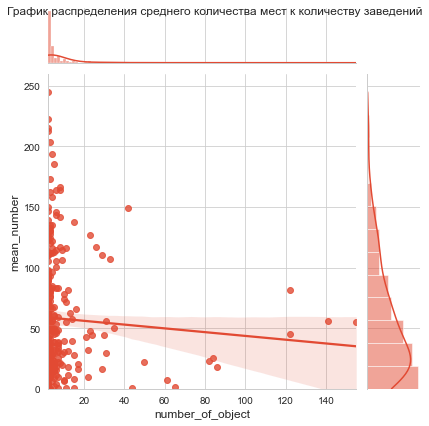

In [20]:
p = sns.jointplot(x='number_of_object', y='mean_number', data=chain_above_1, kind='reg', ylim=(0, 260))
p.fig.suptitle("График распределения среднего количества мест к количеству заведений")
plt.show()

На основании графика можно сделать вывод о том, что для заведений характерно малое количество заведений с большим количеством мест.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [21]:
number = rest_data.groupby(['object_type']).agg({'number':'mean'}).sort_values(by='number',ascending=False).reset_index()
number['number'] = round(number['number'], 2)
number

,object_type,number
0,столовая,130.25
1,ресторан,96.83
2,буфет,51.13
3,бар,43.49
4,кафе,39.72
5,предприятие быстрого обслуживания,20.55
6,кафетерий,9.12
7,закусочная,7.61
8,магазин (отдел кулинарии),5.59


In [22]:
fig = px.bar(number, 
            y='number',
            x='object_type',
            labels={
                     "number": "Среднее количество посадочных мест, шт",
                     "object_type": "Тип объекта"
                 },
             title='Среднее количество посадочных мест в различных типах заведений')
fig.show()

Самое большое количество мест предоставляют столовые и рестораны, у которых количество мест более 90 соответственно. Это можно объяснить тем, что столовые обычно располагаются в местах концентрации большого количества людей (ВУЗы, колледжи, заводы и т.д.). Рестораны в основном также обладают большим количеством посадочных мест. Кафе, которое нас интересует в среднем рассчитано на около 40 мест. 

### Выделите в отдельный столбец информацию об улице из столбца address .

In [23]:
list = (['город Московский','поселение "Мосрентген"','поселение Московский','поселение Михайлово-Ярцевское',
        'поселение Марушкинское','город Троицк','поселение Сосенское', 'город Зеленоград'])
def get_street(row):
    if row['address'].split(",")[0].strip() == 'город Москва' and row['address'].split(",")[1].strip() not in list:
        return row['address'].split(",")[1].strip()
    elif row['address'].split(",")[1].strip() in list:
        return row['address'].split(",")[2].strip()
    else:
        return row['address'].split(",")[0].strip()
rest_data['street'] = rest_data.apply(get_street,axis=1)
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,Несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,Несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,Несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,Сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,Несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,Сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,Сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,Сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [24]:
top10_location = rest_data.groupby(['street']).agg({'object_name':'count'}).sort_values(by='object_name',ascending=False).reset_index().head(10)
top10_location.columns = ['street', 'number_of_object']
top10_location

,street,number_of_object
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [25]:
fig = px.bar(top10_location, 
            y='number_of_object',
            x='street',
            labels={
                     "number_of_object": "Количество объектов, расположенных на улице",
                     "street": "Название улицы"
                 },
             title='Топ-10 улиц по количеству объектов')
fig.show()

In [26]:
spreadsheet_id = '1uaz1BBc05j4ob_BQ8bOc0DupOgf_Ggibu2498sdyvFI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_street = pd.read_csv(BytesIO(r.content))
data_street.to_csv('data_street.csv')
data_street.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [27]:
data_street.rename(columns={'streetname':'street'}, inplace=True)
data_street['street'] = data_street['street'].str.strip()
data_street.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [28]:
top10_area = top10_location.merge(data_street, how='left')
top10_area = top10_area.groupby('street').agg({'area':lambda x: ', '.join(x)}).reset_index()
top10_area.style.set_caption('Топ-10 улиц по районам Москвы')

,street,area
0,Варшавское шоссе,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово"
1,Каширское шоссе,"Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное"
2,Кировоградская улица,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное"
3,Кутузовский проспект,"Район Дорогомилово, Район Фили-Давыдково"
4,Ленинградский проспект,"Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол"
5,Ленинский проспект,"Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка"
6,Пресненская набережная,Пресненский район
7,Профсоюзная улица,"Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан"
8,проспект Вернадского,"Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район"
9,проспект Мира,"Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район"


Самыми "населенными" улицами Москвы стали Проспект Мира, Профсоюзная улица и Ленинградский проспект - 204, 183 и 173 заведения, соответственно. Эти улицы известны как районы в центре Москвы, хотя и находятся они на протяжении нескольких районов. 

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [29]:
count = rest_data.groupby(['street']).agg({'object_name':'count'}).sort_values(by='object_name',ascending=False).reset_index()
count.columns = ['street', 'number_of_object']
location_1 = count.query('number_of_object == 1')
location_1.head()

,street,number_of_object
1379,улица Фонвизина,1
1380,1-й Тушинский проезд,1
1381,Большой Строченовский переулок,1
1382,1-й Вешняковский проезд,1
1383,1-й проезд Марьиной Рощи,1


In [30]:
location_1_area = location_1.merge(data_street, how='left')
location_1_area.dropna(subset=['area'], inplace=True)
location_1_area = location_1_area.groupby('street').agg({'area':lambda x: ','.join(x)}).reset_index()
location_1_area = location_1_area.groupby('area').agg({'street' : 'count'}).sort_values(by='street', ascending=False).head(10)
location_1_area.style.set_caption('Названия районов с количеством заведений 1')

,street
area,
Таганский район,25
Басманный район,23
Район Хамовники,22
Тверской район,19
Район Марьина роща,16
Район Сокольники,15
Пресненский район,15
Мещанский район,12
Район Замоскворечье,12


Улиц с одним заведением питания всего собралось в наборе данных около 500. В то время, когда они находятся как в центре Москвы, так и на окраинах (например, Альтуфьево, Южное Бутово и т.д.)

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [31]:
top10 = top10_location['street']
top10_number = rest_data.query('street in @top10')
top10_number

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,Сетевое,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,Сетевое,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,Несетевое,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма в пите,Несетевое,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,Несетевое,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,ДОДО пицца,Сетевое,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,Милти,Сетевое,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,Сетевое,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15350,213061,Мята,Сетевое,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


In [32]:
fig = px.box(top10_number, 
             x='street', 
             y='number', 
             title='Распределение посадочных мест для улиц с большим количеством объектов')
fig.update_layout(xaxis_title='Топ-10 улиц по количеству объектов',
                 yaxis_title='Количество мест, шт')
fig.data[0].marker.line.color = 'green'
fig.show()

Среди топ-10 улиц по количеству объектов выделяется Кутузовских проспект, так как у него существуют выбросы в заведениях на 1700 и 1200 мест. Такие значения существуют только в столовой Храма Христа Спасителя.

# Общий вывод

По результатам исследования можно сделать вывод:
1) Наибольшее количество заведений соответствует типу кафе, таких заведени 6099, что соответствует 39,69% от общего количества. 2) Для этого типа заведений также подходит наибольшая доля сетевых заведений - 9%. 
3) На графике распределения покывается, что большому количеству заведений соответствует малое количество мест.
4) Самое большое количество в среднем мест принадлежит столовым - более 130 мест. 
5) Наибольшее количество заведений расположено на проспекте Мира более 200 заведений. 
В рамках проекта стоит отметить, что роботизированное кафе стоит открывать в центре Москвы, в частности на Профсоюзной улице в районе Академический. Вот некоторые аргументы: 
1) эта улица входит в топ-10 самых "загруженных" по заведениям, то есть там большая проходимость людей, что может сыграть на руку попытке выделиться и сделать специфическое кафе с роботами; 
2) Этот район находится недалеко от МГУ, главного и одного из самых больших университетов Москвы и России, а значит молодые студенты должны оценить новинку;
3) В среднем на этой улице заведения располагают 24 местами для посадки, то есть на аренду или покупку помещения можно потратить меньшее количество денежных средств, в то время как роботы значительно убыстрят работу кафе.

Презентация: https://disk.yandex.ru/i/g-4Ew3192XL-tg